# Tutorial 1: Introduction to flopy

Link For code: https://github.com/modflowpy/flopy#modflow-6-quick-start

## Load the modules
flopy module is the main module to run flopy, and matplotlib is here in case you want to save the plots.

In [1]:
import flopy
import matplotlib.pyplot as plt

## Here we define the working directory and modflow path

In [2]:
ws = './tutorial-1'
name = 'tutorial-1'
sim = flopy.mf6.MFSimulation(sim_name=name, sim_ws=ws, exe_name='modflow-mf6')

/usr/lib/python3.10/site-packages/jupyter_client/jsonutil.py:76: DeprecationWarning: Interpreting naive datetime as local 2022-02-22 13:09:56. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


## continue with defining things for simlulation

In [3]:
tdis = flopy.mf6.ModflowTdis(sim)
ims = flopy.mf6.ModflowIms(sim)
gwf = flopy.mf6.ModflowGwf(sim, modelname=name, save_flows=True)

/usr/lib/python3.10/site-packages/jupyter_client/jsonutil.py:76: DeprecationWarning: Interpreting naive datetime as local 2022-02-22 13:09:57. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


## Here we define the number of row and columns
As well as the values for heads in some grid locations.

In [4]:
dis = flopy.mf6.ModflowGwfdis(gwf, nrow=10, ncol=10)
ic = flopy.mf6.ModflowGwfic(gwf)
npf = flopy.mf6.ModflowGwfnpf(gwf, save_specific_discharge=True)
chd = flopy.mf6.ModflowGwfchd(gwf, stress_period_data=[[(0, 0, 0), 1.],
                                                       [(0, 9, 9), 0.]])

/usr/lib/python3.10/site-packages/jupyter_client/jsonutil.py:76: DeprecationWarning: Interpreting naive datetime as local 2022-02-22 13:09:57. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


## Here we decide on what to save and where

In [5]:
oc = flopy.mf6.ModflowGwfoc(gwf,
                            budget_filerecord=f'{name}.bud',
                            head_filerecord=f'{name}.hds',
                            saverecord=[('HEAD', 'ALL'), ('BUDGET', 'ALL')])

/usr/lib/python3.10/site-packages/jupyter_client/jsonutil.py:76: DeprecationWarning: Interpreting naive datetime as local 2022-02-22 13:09:58. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


## Run the simulation

In [6]:
sim.write_simulation()
sim.run_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims_-1...
  writing model tutorial-1...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 2 based on size of stress_period_data
    writing package oc...
FloPy is using the following executable to run the model: /usr/local/bin/modflow-mf6
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.2 07/30/2021

  MODFLOW 6 compiled Feb 22 2022 12:32:23 with GFORTRAN compiler (ver. 11.2.0)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review.

/usr/lib/python3.10/site-packages/jupyter_client/jsonutil.py:76: DeprecationWarning: Interpreting naive datetime as local 2022-02-22 13:09:58. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


(True, [])

## Now to analyze we extract the head and budget data

In [7]:
head = gwf.output.head().get_data()
bud = gwf.output.budget()

spdis = bud.get_data(text='DATA-SPDIS')[0]
qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)

/usr/lib/python3.10/site-packages/jupyter_client/jsonutil.py:76: DeprecationWarning: Interpreting naive datetime as local 2022-02-22 13:09:59. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


## Plot the output

/usr/lib/python3.10/site-packages/jupyter_client/jsonutil.py:76: DeprecationWarning: Interpreting naive datetime as local 2022-02-22 13:09:59. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


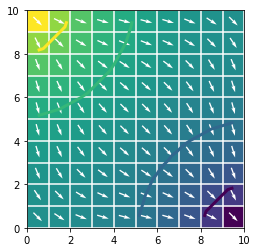

In [8]:
pmv = flopy.plot.PlotMapView(gwf)
pmv.plot_array(head)
pmv.plot_grid(colors='white')
pmv.contour_array(head, levels=[.2, .4, .6, .8], linewidths=3.)
pmv.plot_vector(qx, qy, normalize=True, color="white")

In [ ]:
# plt.savefig("./images/tutorial-1.png")